In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
X = data.iloc[:,[3,4]].values

In [7]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [9]:
model = AffinityPropagation(damping=0.9, random_state=42)
model.fit(X)

AffinityPropagation(damping=0.9, random_state=42)

In [11]:
# Get labels and cluster centers
labels = model.labels_
cluster_centers = model.cluster_centers_indices_

In [13]:
print("Number of clusters:", len(cluster_centers))
print("Cluster centers (indices):", cluster_centers)

Number of clusters: 10
Cluster centers (indices): [ 22  25  26  62 109 144 149 159 189 190]


In [17]:
# Add cluster labels to original data
data['Cluster'] = labels

In [21]:
data.Cluster.value_counts()

Cluster
4    45
3    39
1    21
5    21
6    14
7    14
0    12
9    12
2    11
8    11
Name: count, dtype: int64

In [23]:
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2


In [25]:
# Evaluate the model (optional)
sil_score = silhouette_score(X, labels)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.44393750015825917


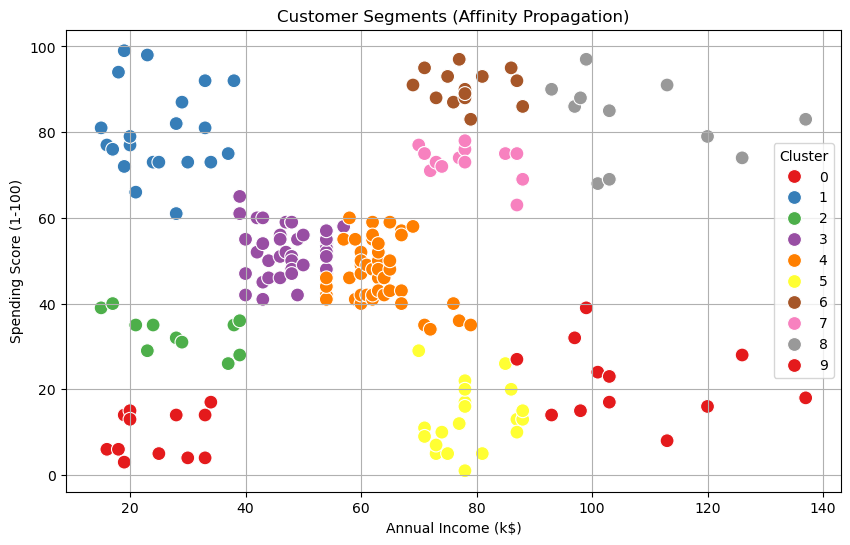

In [29]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
plt.title("Customer Segments (Affinity Propagation)")
plt.grid(True)
plt.show()